<a href="https://colab.research.google.com/github/kdh1647/Bumblebee2/blob/master/513Y001_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#학습과 테스트 모델 분리
from sklearn.model_selection import train_test_split

In [3]:
## 데이터 Read  10년치 경제심리 지수
raw_df = pd.read_csv('https://raw.githubusercontent.com/kdh1647/Bumblebee2/master/513Y001.csv', encoding='CP949')

In [4]:
raw_df.head(5)

,Unnamed: 0,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,TIME,DATA_VALUE
0,0,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201301,94.5
1,1,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201302,96.3
2,2,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201303,98.3
3,3,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201304,97.9
4,4,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201305,97.3


In [5]:
data = raw_df[['TIME', 'DATA_VALUE']]    #필요컬럼만 추출

In [6]:
data.TIME = pd.to_datetime(data['TIME'].astype(str) + '01', format='%Y-%m-%d')    #년월을 날짜형태로 변형 202003 -> 2022-03-01

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
data

,TIME,DATA_VALUE
0,2013-01-01,94.5
1,2013-02-01,96.3
2,2013-03-01,98.3
3,2013-04-01,97.9
4,2013-05-01,97.3
...,...,...
112,2022-05-01,106.7
113,2022-06-01,102.5
114,2022-07-01,97.8
115,2022-08-01,99.3


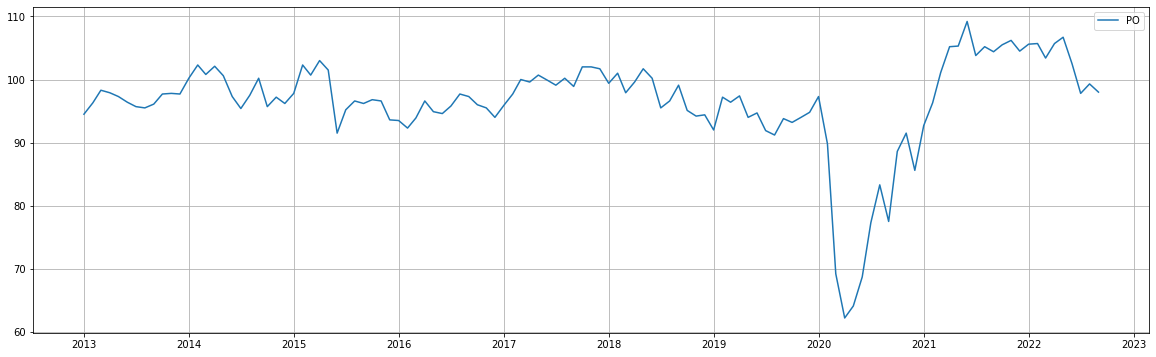

In [8]:
plt.figure(figsize=(20,6))
plt.plot(data['TIME'], data['DATA_VALUE'], label='PO')
plt.grid()
plt.legend(loc='best')

plt.show()

In [9]:
# MAPE(Mean Absolut Percentage Error) 평균 절대 백분율 오차로 모델 오차율 검증
def MAPE_Val(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

### 08. Prophet

### https://facebook.github.io/prophet/

In [10]:
#prophet 라이브러리 선언
from prophet import Prophet    
from prophet.plot import add_changepoints_to_plot

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TIME        117 non-null    datetime64[ns]
 1   DATA_VALUE  117 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [12]:
df_pr = data.copy()    #prophat용 dataframe

In [ ]:
df_pr.TIME = pd.to_datetime(df_pr['TIME'], format='%Y%m', errors='coerce')

In [13]:
df_pr.columns = ['ds','y']    # column명을 ds와 y로 변경

In [48]:
train_data_pr, test_data_pr = train_test_split(df_pr, test_size=0.2, shuffle=False)    #train과 test분리

In [51]:
#날짜 컬럼을 인덱스화->그래프 그리기 편함
test_data_pr = test_data_pr.set_index('ds')

In [52]:
# prophet 모델생성 및 학습
m = Prophet()
m.fit(train_data_pr)

# 테스트 데이터 만큼예측
future = m.make_future_dataframe(periods=len(test_data_pr),freq='MS')
prophet_pred = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa79svxvh/ty9ki6xm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa79svxvh/zv92aobz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46989', 'data', 'file=/tmp/tmpa79svxvh/ty9ki6xm.json', 'init=/tmp/tmpa79svxvh/zv92aobz.json', 'output', 'file=/tmp/tmpa79svxvh/prophet_modelstndi2yo/prophet_model-20221115032233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:22:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
#예측 데이터 조회
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
112,2022-05-01,61.666588,56.617447,68.571015,60.176253,63.176800,0.916780,0.916780,0.916780,0.916780,0.916780,0.916780,0.0,0.0,0.0,62.583368
113,2022-06-01,60.852307,54.098468,65.601572,59.281749,62.490761,-1.071683,-1.071683,-1.071683,-1.071683,-1.071683,-1.071683,0.0,0.0,0.0,59.780624
114,2022-07-01,60.064294,52.976191,64.840433,58.399602,61.833203,-0.943585,-0.943585,-0.943585,-0.943585,-0.943585,-0.943585,0.0,0.0,0.0,59.120709
115,2022-08-01,59.250014,54.036014,66.204369,57.485775,61.100711,0.793261,0.793261,0.793261,0.793261,0.793261,0.793261,0.0,0.0,0.0,60.043275
116,2022-09-01,58.435734,54.767102,66.905544,56.549866,60.413146,2.148795,2.148795,2.148795,2.148795,2.148795,2.148795,0.0,0.0,0.0,60.584529


In [54]:
#일자와 예측 컬럼만 추출
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-len(test_data_pr):]['ds'], "Pred" : prophet_pred[-len(test_data_pr):]["yhat"]})

In [60]:
prophet_pred = prophet_pred.set_index('Date')

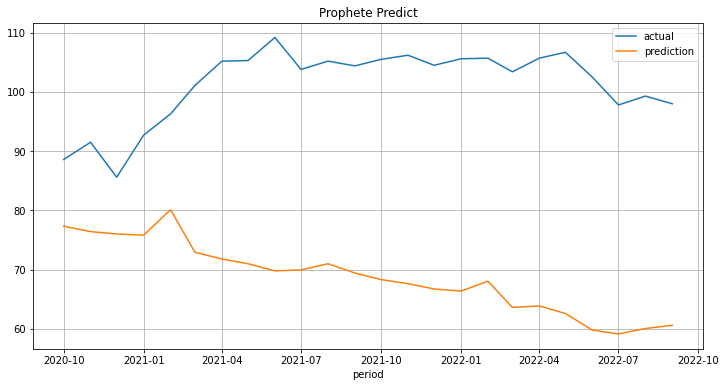

In [62]:
plt.figure(figsize=(12,6))
plt.title('Prophete Predict')
plt.xlabel('period')
plt.plot(test_data_pr, label='actual')
plt.plot(prophet_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [63]:
MAPE_Val(prophet_pred['Pred'].values, test_data_pr['y'].values)

0.3172145305595522

In [64]:
#프로펫 계절성, 휴일 변수 추가

m = Prophet(
##trend
            #  changepoint_prior_scale=0.3,
##seasonality
          weekly_seasonality=20,
          yearly_seasonality=15
          # daily_seasonality=13    
           )

#지역 휴일 내장함수 
m.add_country_holidays(country_name='KR')

m.fit(train_data_pr)
future = m.make_future_dataframe(periods=len(test_data_pr),freq='MS')
prophet_pred = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa79svxvh/uik8zux4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa79svxvh/j12v4bqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17200', 'data', 'file=/tmp/tmpa79svxvh/uik8zux4.json', 'init=/tmp/tmpa79svxvh/j12v4bqo.json', 'output', 'file=/tmp/tmpa79svxvh/prophet_modelp979qr8c/prophet_model-20221115032432.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:24:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# changepoint_prior_scale에 값을 주었을 때 변경 구간 탐색

# fig = m.plot(prophet_pred)
# a = add_changepoints_to_plot(fig.gca(), m, prophet_pred)

In [65]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-len(test_data_pr):]['ds'], "Pred" : prophet_pred[-len(test_data_pr):]["yhat"]})

In [66]:
prophet_pred = prophet_pred.set_index('Date')

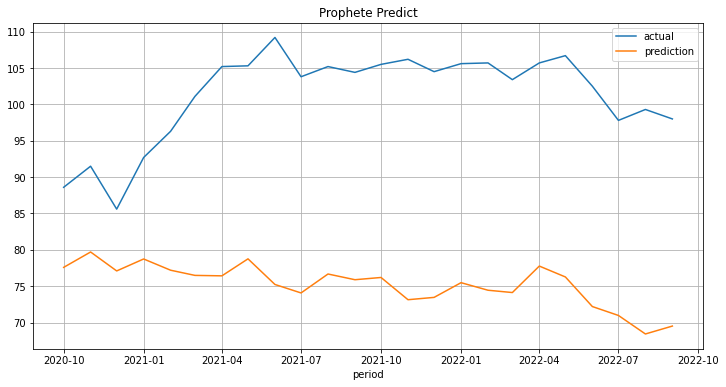

In [67]:
plt.figure(figsize=(12,6))
plt.title('Prophete Predict')
plt.xlabel('period')
plt.plot(test_data_pr, label='actual')
plt.plot(prophet_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [68]:
MAPE_Val(prophet_pred['Pred'].values, test_data_pr['y'].values)

0.2534098828200142